<a href="https://colab.research.google.com/github/pManiSathish/FML/blob/main/Multivariate_Reg_on_50startups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('50_Startups_dataset.csv')


In [3]:
data.columns


Index(['Unnamed: 0', 'R&D Spend', 'Administration', 'Marketing Spend', 'State',
       'Profit'],
      dtype='object')

In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       50 non-null     int64  
 1   R&D Spend        50 non-null     float64
 2   Administration   50 non-null     float64
 3   Marketing Spend  50 non-null     float64
 4   State            50 non-null     object 
 5   Profit           50 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 2.5+ KB


In [5]:
data.dtypes


Unnamed: 0           int64
R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [6]:
data.isnull().sum()
data.head()


,Unnamed: 0,R&D Spend,Administration,Marketing Spend,State,Profit
0,0,165349.30,136897.90,471784.20,New York,192261.93
1,1,162597.80,151377.69,443898.63,California,191792.16
2,2,153441.61,101145.65,407934.64,Florida,191050.49
3,3,144372.51,118671.95,383199.72,New York,182902.09
4,4,142107.44,91391.87,366168.52,Florida,166188.04


In [7]:
data.tail()


,Unnamed: 0,R&D Spend,Administration,Marketing Spend,State,Profit
45,45,1000.33,124153.14,1904.03,New York,64926.18
46,46,1315.56,115816.31,297114.56,Florida,49490.85
47,47,0.10,135427.02,0.10,California,42559.83
48,48,542.15,51743.25,0.10,New York,35673.51
49,49,0.10,116983.90,45173.16,California,14681.50


In [8]:
data.describe()


,Unnamed: 0,R&D Spend,Administration,Marketing Spend,Profit
count,50.00000,50.000000,50.000000,50.000000,50.000000
mean,24.50000,73721.715600,121344.739600,211025.197800,112012.739200
std,14.57738,45902.256482,28017.802755,122290.310726,40306.180338
min,0.00000,0.100000,51283.240000,0.100000,14681.500000
25%,12.25000,39936.470000,103730.975000,129300.232500,90139.002500
50%,24.50000,73051.180000,122699.895000,212716.340000,107978.290000
75%,36.75000,101602.900000,144842.280000,299469.185000,139766.077500
max,49.00000,165349.300000,182645.660000,471784.200000,192261.930000


In [9]:
data.shape


(50, 6)

In [10]:
data.describe().loc['mean']


Unnamed: 0             24.5000
R&D Spend           73721.7156
Administration     121344.7396
Marketing Spend    211025.1978
Profit             112012.7392
Name: mean, dtype: float64

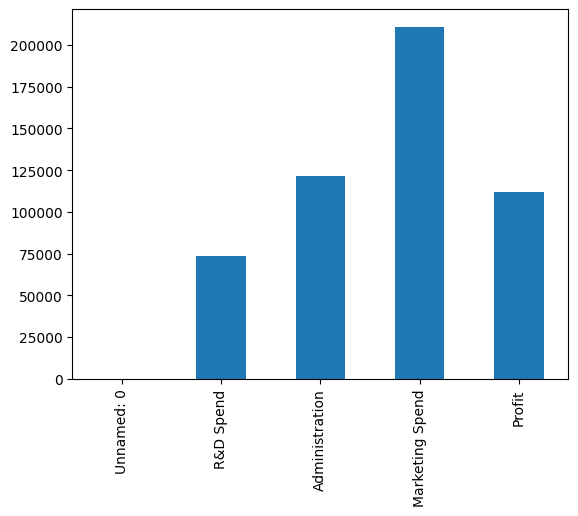

In [11]:
data.describe().loc['mean'].plot.bar()
plt.show()

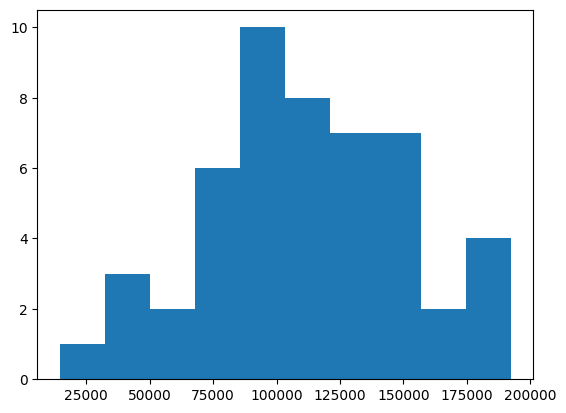

In [12]:
plt.hist(data['Profit'])
plt.show()

In [13]:
d = data.corr()
d

,Unnamed: 0,R&D Spend,Administration,Marketing Spend,Profit
Unnamed: 0,1.000000,-0.979395,-0.229336,-0.729937,-0.973629
R&D Spend,-0.979395,1.000000,0.241955,0.724248,0.972900
Administration,-0.229336,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,-0.729937,0.724248,-0.032154,1.000000,0.747766
Profit,-0.973629,0.972900,0.200717,0.747766,1.000000


In [14]:
d.shape


(5, 5)

<Axes: >

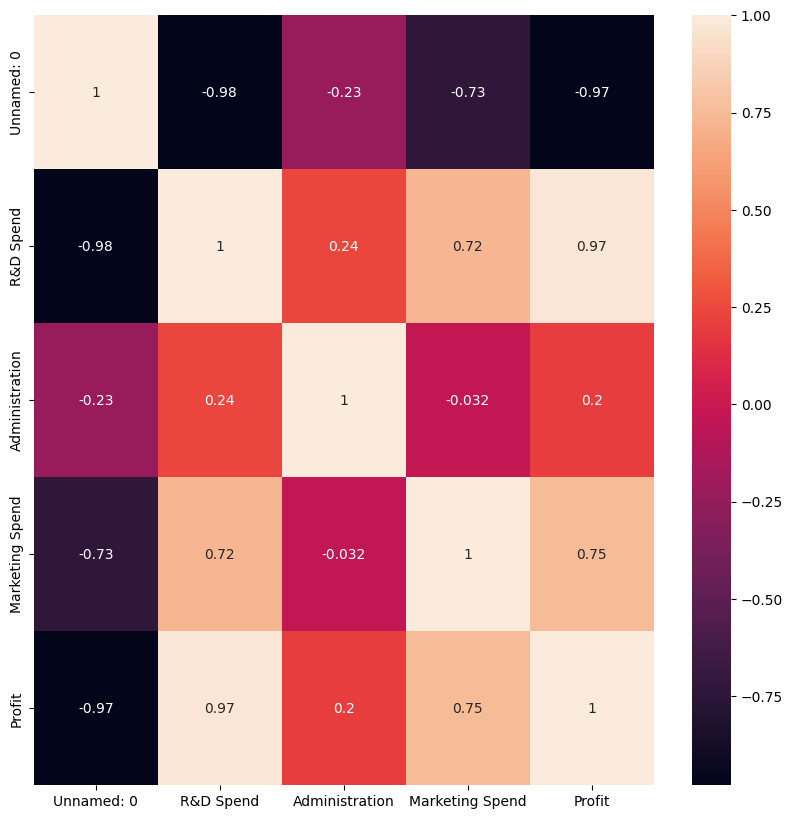

In [15]:
plt.figure(figsize = (10,10))
sns.heatmap(d,annot = True)


In [16]:
X = data.iloc[:,:-1]
X = X.select_dtypes(include = np.number)
y = data.iloc[:,-1]

In [17]:
X.shape,y.shape
y = np.array(y)
y = y.reshape(-1,1)

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state = 32)

In [19]:
X_train.shape,y_train.shape


((35, 4), (35, 1))

In [20]:
X_test.shape,y_test.shape


((15, 4), (15, 1))

In [21]:
from sklearn import linear_model


In [22]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [23]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_pred1 = reg.predict(X_train)
print(f'Performance of the model on training data :\n')
print(f'MAE = {mean_absolute_error(y_train, y_pred1)}')
print(f'MSE = {mean_squared_error(y_train, y_pred1)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_train, y_pred1))}')
print(f'R_2 = {r2_score(y_train, y_pred1)}')

Performance of the model on training data :

MAE = 5419.722324858122
MSE = 40118380.82833562
RMSE = 6333.90723237526
R_2 = 0.9732532059409266


In [24]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_pred2 = reg.predict(X_test)
print(f'Performance of the model on test data :\n')
print(f'MAE = {mean_absolute_error(y_test, y_pred2)}')
print(f'MSE = {mean_squared_error(y_test, y_pred2)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test, y_pred2))}')
print(f'R_2 = {r2_score(y_test, y_pred2)}')

Performance of the model on test data :

MAE = 8044.968126830612
MSE = 125077925.69901744
RMSE = 11183.824287738851
R_2 = 0.9228535446821403


In [25]:
from sklearn.linear_model import Lasso


In [26]:
reg = Lasso(alpha = 0.1)
reg.fit(X_train,y_train)

Lasso(alpha=0.1)

In [27]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_predict = reg.predict(X_train)
print(f'Performance of the model on training data :\n')
print(f'MAE = {mean_absolute_error(y_train, y_predict)}')
print(f'MSE = {mean_squared_error(y_train, y_predict)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_train, y_predict))}')
print(f'R_2 = {r2_score(y_train, y_predict)}')

Performance of the model on training data :

MAE = 5419.718280978448
MSE = 40118380.829614714
RMSE = 6333.907232476232
R_2 = 0.9732532059400738


In [28]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_predict1 = reg.predict(X_test)
print(f'Performance of the model on test data :\n')
print(f'MAE = {mean_absolute_error(y_test, y_predict1)}')
print(f'MSE = {mean_squared_error(y_test, y_predict1)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test, y_predict1))}')
print(f'R_2 = {r2_score(y_test, y_predict1)}')

Performance of the model on test data :

MAE = 8044.972167303981
MSE = 125078102.87503491
RMSE = 11183.83220881979
R_2 = 0.9228534354022523


In [29]:
from sklearn.linear_model import Ridge


In [30]:
reg = Ridge(alpha = 0.8)
reg.fit(X_train,y_train)

Ridge(alpha=0.8)

In [31]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_predict = reg.predict(X_train)
print(f'Performance of the model on training data :\n')
print(f'MAE = {mean_absolute_error(y_train, y_predict)}')
print(f'MSE = {mean_squared_error(y_train, y_predict)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_train, y_predict))}')
print(f'R_2 = {r2_score(y_train, y_predict)}')

Performance of the model on training data :

MAE = 5418.716515527069
MSE = 40118459.96656934
RMSE = 6333.913479561379
R_2 = 0.9732531531797235


In [32]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_predict1 = reg.predict(X_test)
print(f'Performance of the model on test data :\n')
print(f'MAE = {mean_absolute_error(y_test, y_predict1)}')
print(f'MSE = {mean_squared_error(y_test, y_predict1)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test, y_predict1))}')
print(f'R_2 = {r2_score(y_test, y_predict1)}')

Performance of the model on test data :

MAE = 8045.97314070001
MSE = 125122101.17396073
RMSE = 11185.79908517763
R_2 = 0.9228262978175572
